# Monty Hall

In [2]:
import PIL
import numpy as np
import pandas as pd
from numpy import random
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

## The game

&#10148; Player A $\rightarrow$ switches door\
&#10148; Player B $\rightarrow$ sticks with first choice\
&#10148; Player C $\rightarrow$ comes when there are only 2 doors left and can choose between them

### Initialize doors array
1 $\rightarrow$ lamborghini\
0 $\rightarrow$ goat

In [3]:
N = 3

doors = np.zeros(N)

car = np.random.randint(N)
doors[car] = 1

doors

#let's simulate the real game

print('*Monty Hall jingle playing*')

print('\nPresentor: "Hello everyone, this is the Monty Hall "goat or car game"!'
      'You have the cance to win a wonderful new car!\nWe have ' + str(N) + 
      ' closed doors behind which there are two goats and a car. '
      ' You have to choose the right one to go home with an amazing lambo!"')

first_choice = np.random.randint(N)

print('\nPresentor: "Here we go! Player A and B, what do you choose?"'
      '\nPlayer A,B: "We choose door number ' + str(first_choice) + '"')


goat_door = 0
print('\n*Behind the scenes*: 1 win or 0 goat', doors,
    "\n*Behind the scenes*: A,B (door number, choice): ", first_choice, ',', doors[first_choice], 
    "; while car is behind door ", car)

while (doors[goat_door] == 1 or goat_door == first_choice):
    goat_door = np.random.randint(N)

print('\nPresentor: "Now we open door number ', goat_door, '...')
if doors[goat_door] == 0: 
    print('.. Oh no! Is a goat!"')
    doors[goat_door] = np.nan
else : print('.."You won the car!"')


#let's introduce the switcher A and the conservative player B

print('\nPresentor: "Players now you have the chance to change your door if you want"')

second_choice = 1
third_choice = 1

while second_choice == goat_door or second_choice == first_choice:
    second_choice = np.random.randint(N)
print('Player A: "Yes, I want to switch and change to door number ',second_choice,'"')
print('Player B: "I will stick with my first choice"')

print('\nPresentor: "Ok so now we have: player A who has switched to door', second_choice, 
      ', player B who is firmly convinced on door', first_choice,
     'and we know that behind the door', goat_door, "there was a goat. So let's introduce a third player: player C!"
     '\nPlayer C, now you can choose between doors', first_choice, 'and', second_choice,'"')

while third_choice == goat_door:
    third_choice = np.random.randint(N)
print('\nPlayer C: "I choose door number',third_choice,'"'
     '\n\nPresentor: "Perfect! Player A: door', second_choice, ', player B: door', first_choice, 
      ' and player C: door', third_choice,". \nLet's see who is going to win!"
     '"','\n\n....')


if  doors[first_choice] == 1 and doors[third_choice] == 1:
    print('\n"Player B and C you both won the car! \nPlayer A unfortunately you won nothing, but you can have the goat."')

elif doors[second_choice] == 1 and doors[third_choice] == 1:
    print('\n"Player A and C you both won the car! \nPlayer B unfortunately you won nothing, but you can have the goat."')

elif doors[first_choice] == 1 : 
    print('\n"Player B you won the car! \nPlayer A and C unfortunately you won nothing, but you can have the goats."')
elif   doors[second_choice] == 1 : 
    print('\n"Player A you won the car! \nPlayer B and C unfortunately you won nothing, but you can have the goats."')
elif   doors[third_choice] == 1 : 
    print('\n"Player C you won the car! \nPlayer A and B unfortunately you won nothing, but you can have the goats."') 

*Monty Hall jingle playing*

Presentor: "Hello everyone, this is the Monty Hall "goat or car game"!You have the cance to win a wonderful new car!
We have 3 closed doors behind which there are two goats and a car.  You have to choose the right one to go home with an amazing lambo!"

Presentor: "Here we go! Player A and B, what do you choose?"
Player A,B: "We choose door number 0"

*Behind the scenes*: 1 win or 0 goat [0. 0. 1.] 
*Behind the scenes*: A,B (door number, choice):  0 , 0.0 ; while car is behind door  2

Presentor: "Now we open door number  1 ...
.. Oh no! Is a goat!"

Presentor: "Players now you have the chance to change your door if you want"
Player A: "Yes, I want to switch and change to door number  2 "
Player B: "I will stick with my first choice"

Presentor: "Ok so now we have: player A who has switched to door 2 , player B who is firmly convinced on door 0 and we know that behind the door 1 there was a goat. So let's introduce a third player: player C!
Player C, now yo

## Probabilities of winning
But what happens if we repeat the game many times? Let's do some statistics

In [4]:
n = 100

winsA = np.zeros(n)
winsB = np.zeros(n)
winsC = np.zeros(n)

for i in range(n):  
    
    N = 3

    doors = np.zeros(N)

    car = np.random.randint(N)
    doors[car] = 1

    doors
    
    #choosing a door

    first_choice = np.random.randint(N)

    goat_door = 0

    while (doors[goat_door] == 1 or goat_door == first_choice):
        goat_door = np.random.randint(N)

    if doors[goat_door] == 0: 
        doors[goat_door] = np.nan



    #changing the door or stick with the first choice

    second_choice = 1
    third_choice = 1

    while second_choice == goat_door or second_choice == first_choice:
        second_choice = np.random.randint(N)
        
    #newcomer chooses between only two doors
    
    while third_choice == goat_door:
        third_choice = np.random.randint(N)
    
    if  doors[first_choice] == 1 and doors[third_choice] == 1:
        winsB[i] = 1
        winsC[i] = 1
        
    elif doors[second_choice] == 1 and doors[third_choice] == 1:
        winsA[i] = 1
        winsC[i] = 1
        
    elif doors[first_choice] == 1 : 
        winsB[i] = 1
        
    elif   doors[second_choice] == 1 : 
        winsA[i] = 1
        
    elif   doors[third_choice] == 1 : 
        winsC[i] = 1
        
    i = i + 1

In [5]:
tot_A = np.zeros(n)
tot_B = np.zeros(n)
tot_C = np.zeros(n)

tot_A[0] = winsA[0]
tot_B[0] = winsB[0]
tot_C[0] = winsC[0]

for i in range(n-1):
    tot_A[i+1] = tot_A[i] + winsA[i]
    tot_B[i+1] = tot_B[i] + winsB[i]
    tot_C[i+1] = tot_C[i] + winsC[i]

In [6]:
names = np.array(['Switcher winnings' , 'Conservative winnings' , 'Newcomer winnings'])
runs = np.array([max(tot_A), max(tot_B), max(tot_C)])

df = pd.DataFrame(data=np.column_stack((tot_A, tot_B, tot_C)), columns=names)

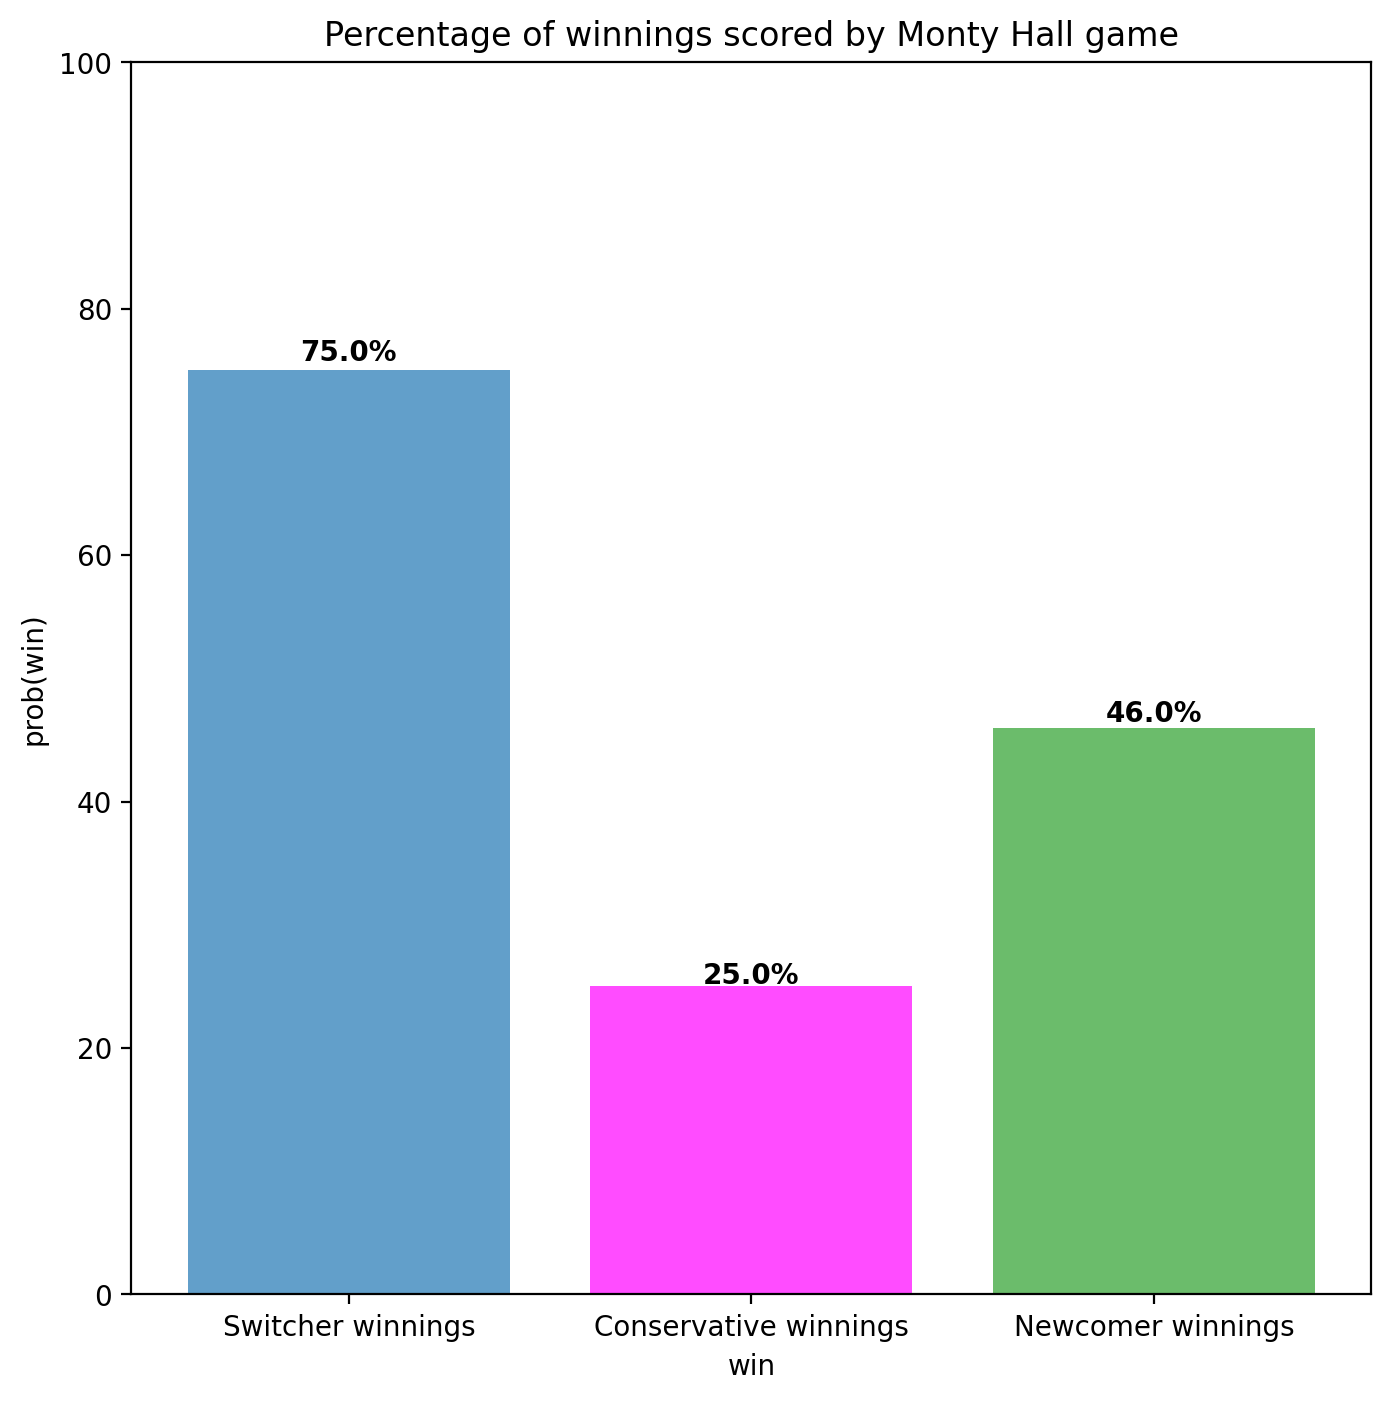

In [7]:
# compute percentage of each bar

percentage = np.zeros(df.shape[1])
for i in range(df.shape[1]):
    percentage[i] = round(runs[i]/n*100,3)

# depict illustration

plt.figure(figsize=(8,8))
colors_list = ['tab:blue', 'Magenta', 'tab:green']
graph = plt.bar(names, runs,color = colors_list,alpha=0.7)
plt.xlabel("win")
plt.ylabel("prob(win)")
plt.ylim(0,n)
plt.title('Percentage of winnings scored by Monty Hall game')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [9]:
import bar_chart_race as bcr

def summary(values, ranks):
    total_throws = n
    s = f'Total throws - {total_throws:,.0f}'
    return {'x': .95, 'y': .9, 's': s, 'ha': 'right', 'size': 8}


bcr.bar_chart_race(df, orientation='v', fixed_max=True, steps_per_period=10, period_length=500,
                  title='Monty Hall probabilties', period_summary_func=summary, filename="MontyHallbarrace.gif")

/home/olga/anaconda3/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
/home/olga/anaconda3/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
/home/olga/anaconda3/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)
MovieWriter imagemagick unavailable; using Pillow instead.


<img src="MontyHallbarrace.gif" align="left" width="600px"/>